## IS6 in Python: Comparing Counts (Chapter 19)

### Introduction and background

This document is intended to assist students in undertaking examples shown in the Sixth Edition of Intro Stats (2022) by De Veaux, Velleman, and Bock. This pdf file as well as the associated ipynb reproducible analysis source file used to create it can be found at (INSERT WEBSITE LINK HERE).

#### Chapter 19: Comparing Counts

In [1]:
#Load libraries
import pandas as pd
from scipy.stats import chi2
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
zodiac = pd.read_csv("datasets/zodiac.txt", sep = "\t")
zodiac[["Sign", "Births"]]

,Sign,Births
0,Pisces,29
1,Aquarius,24
2,Aries,23
3,Cancer,23
4,Capricorn,22
5,Scorpio,21
6,Taurus,20
7,Leo,20
8,Saggitarius,19
9,Virgo,19


#### Section 19.1: Goodness-of-Fit Tests
#### Example 19.1: Finding Expected Counts

In [3]:
birth = pd.read_csv("datasets/ballplayer-births.txt", sep = "\t")
natbirth = [.08,.07,.08,.08,.08,.08,.09,.09,.09,.09,.08,.09]
birth["natbirth"] = natbirth
birth.head()

,Ballplayer Count,Month,natbirth
0,137,1,0.08
1,121,2,0.07
2,116,3,0.08
3,121,4,0.08
4,126,5,0.08


In [4]:
#Find expected counts
birth = birth.assign(expected = birth["Ballplayer Count"].sum() * birth["natbirth"])
birth

,Ballplayer Count,Month,natbirth,expected
0,137,1,0.08,118.24
1,121,2,0.07,103.46
2,116,3,0.08,118.24
3,121,4,0.08,118.24
4,126,5,0.08,118.24
5,114,6,0.08,118.24
6,102,7,0.09,133.02
7,165,8,0.09,133.02
8,134,9,0.09,133.02
9,115,10,0.09,133.02


#### Assumptions and Conditions
#### Calcuations
#### Chi-Square P-Values

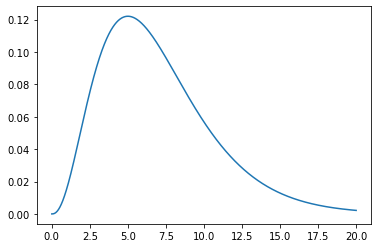

4.605170185988092
18.307038053275146


In [5]:
#Examples of chisq p-values
x_axis = np.arange(0, 20, 0.01)
plt.plot(x_axis, chi2.pdf(x_axis, df = 7))
plt.show()

#Use ppf() to find chisq value, given q and df
print(chi2.ppf(q = 0.9, df = 2))
print(chi2.ppf(q = 0.95, df = 10))

Note: qchisq() vs chi.ppf()
- qchisq() in R takes 2 main arguments, p and df
- chi.ppf() in Python takes 2 main arguments q and df

Note the p and q. They are different, but interconnected. We can calculate q from p using the equation q = 1 - p, or p = 1 - q. This is the only subtle difference between the two functions

#### Example 19.3: Doing a Goodness-of-Fit Test

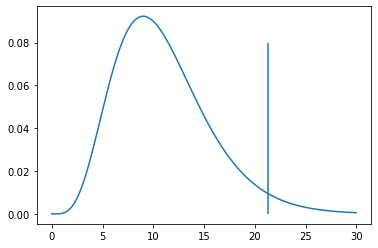

expected count : 21.333


In [6]:
#Page 646
x_axis = np.arange(0, 30, 0.01)
plt.plot(x_axis, chi2.pdf(x_axis, df = 11))
expected = zodiac['Expected'][0]
plt.vlines(x = expected, ymin = 0, ymax = 0.08)
plt.show()

#Expected
print(f"expected count : {expected}")

In [7]:
zodiac.head()

,Sign,Births,Expected,Residual
0,Pisces,29,21.333,7.667
1,Aquarius,24,21.333,2.667
2,Aries,23,21.333,1.667
3,Cancer,23,21.333,1.667
4,Capricorn,22,21.333,0.667


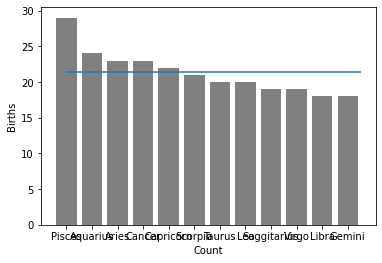

In [8]:
sns.barplot(data = zodiac, x = "Sign", y = "Births", color = "grey")
plt.hlines(xmin = 0, xmax = 11.5, y = expected)
plt.xlabel("Count")
plt.show()

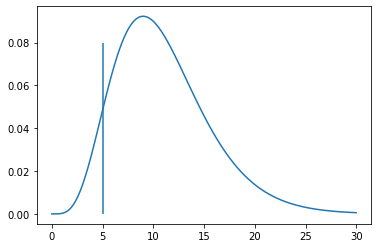

p-value given chisq of 5.094 and df of 11: 0.9265288305884755
Note how the two chisq values are very close to each other: 5.093999999999999 and 5.094


In [9]:
#Expected value for all 12 signs, provided by the book
x2 = 5.094

x_axis = np.arange(0, 30, 0.01)
plt.plot(x_axis, chi2.pdf(x_axis, df = 11))
plt.vlines(x = x2, ymin = 0, ymax = 0.08)
plt.show()

#Calculate p-value
p_value = chi2.sf(x = 5.094, df = 11)
print(f"p-value given chisq of 5.094 and df of 11: {p_value}")

#Double check chisq value using ppf, given that p = 0.926 from textbook
print(f"Note how the two chisq values are very close to each other: {chi2.ppf(q = 1 - p_value, df = 11)} and {x2}")

Note: xpchisq() in R == chi.sf() in Python
- chi2.sf() is called the survival function (also defined as 1 - cdf, but sf is sometimes more accurate). Use this function when you have the chisq value and degrees of freedom to calculate the p-value
- It has the same effect as xpchisq() in R!

#### The Chi-Square Calculation

In [10]:
zodiac.head()

,Sign,Births,Expected,Residual
0,Pisces,29,21.333,7.667
1,Aquarius,24,21.333,2.667
2,Aries,23,21.333,1.667
3,Cancer,23,21.333,1.667
4,Capricorn,22,21.333,0.667


In [22]:
zodiac = zodiac.assign(residsq = zodiac["Residual"] ** 2)
zodiac = zodiac.assign(component = zodiac["residsq"] / zodiac["Expected"])
zodiac

,Sign,Births,Expected,Residual,residsq,component
0,Pisces,29,21.333,7.667,58.782889,2.755491
1,Aquarius,24,21.333,2.667,7.112889,0.333422
2,Aries,23,21.333,1.667,2.778889,0.130262
3,Cancer,23,21.333,1.667,2.778889,0.130262
4,Capricorn,22,21.333,0.667,0.444889,0.020854
5,Scorpio,21,21.333,-0.333,0.110889,0.005198
6,Taurus,20,21.333,-1.333,1.776889,0.083293
7,Leo,20,21.333,-1.333,1.776889,0.083293
8,Saggitarius,19,21.333,-2.333,5.442889,0.255139
9,Virgo,19,21.333,-2.333,5.442889,0.255139


#### The Trouble with Goodness-of-Fit Tests: What's the Alternative?
#### Section 19.2: Chi-Square Test of Homogeneity

In [13]:
#Create dataframe
data = np.array(["Employed", "Agriculture"] * 209 
                     + ["Employed", "Arts & Sciences"] * 198
                     + ["Employed", "Engineering"] * 177
                     + ["Employed", "ILR"] * 101 
                     + ["Grad School", "Agriculture"] * 104
                     + ["Grad School", "Arts & Sciences"] * 171
                     + ["Grad School", "Engineering"] * 158
                     + ["Grad School", "ILR"] * 33 
                     + ["Other", "Agriculture"] * 135
                     + ["Other", "Arts & Sciences"] * 115
                     + ["Other", "Engineering"] * 39
                     + ["Other", "ILR"] * 16).reshape(-1,2)
data = pd.DataFrame(data, columns = ["activity", "school"])
data.head()

,activity,school
0,Employed,Agriculture
1,Employed,Agriculture
2,Employed,Agriculture
3,Employed,Agriculture
4,Employed,Agriculture


In [14]:
#Table 19.1, page 650
table = pd.crosstab(index = data["activity"], columns = data["school"], margins = True, margins_name = "Total")
table

school,Agriculture,Arts & Sciences,Engineering,ILR,Total
activity,,,,,
Employed,209,198,177,101,685
Grad School,104,171,158,33,466
Other,135,115,39,16,305
Total,448,484,374,150,1456


In [17]:
#Table 19.2, page 650
table = pd.crosstab(index = data["activity"], columns = data["school"], margins = True, margins_name = "Total", normalize = "columns")
table

school,Agriculture,Arts & Sciences,Engineering,ILR,Total
activity,,,,,
Employed,0.466518,0.409091,0.473262,0.673333,0.470467
Grad School,0.232143,0.353306,0.422460,0.220000,0.320055
Other,0.301339,0.237603,0.104278,0.106667,0.209478


In [18]:
#Table 19.3

Question: How to create this table in the most simple way? I can manually calculate each block and put them all together, but it's too labor intensive

#### Step-By-Step Example: A Chi-Square Test for Homogeneity

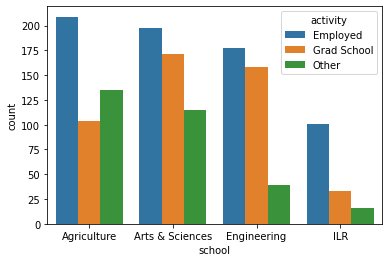

In [21]:
sns.countplot(data = data, x = "school", hue = "activity")
plt.show()

Question:
- sns.countplot() doesn't have a normalize argument. What should I do?
- How to replicate the table in the example?

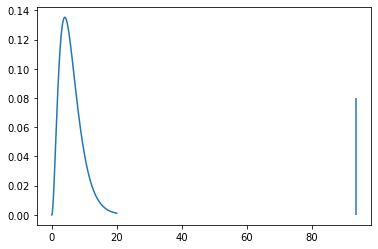

p-value given chisq of 93.66 and df of 6: 5.254724789357363e-18


In [25]:
#Mechanics
#chi-squared value
chisq = 93.66

x_axis = np.arange(0, 20, 0.01)
plt.plot(x_axis, chi2.pdf(x_axis, df = 6))
plt.vlines(x = chisq, ymin = 0, ymax = 0.08)
plt.show()

#Calculate p-value
p_value = chi2.sf(x = chisq, df = 6)
print(f"p-value given chisq of 93.66 and df of 6: {p_value}")

#### Section 19.3: Examining the Residuals

In [26]:
#Table 19.4, page 654

Note: I can't create table 19.4 without table 19.3

#### Example 19.4: Looking at $X^2$, Residuals

In [32]:
birth = birth.assign(residuals = (birth["Ballplayer Count"] - birth["expected"]) / np.sqrt(birth["expected"]))
birth[["Month", "residuals"]]

,Month,residuals
0,1,1.725244
1,2,1.724421
2,3,-0.205999
3,4,0.253821
4,5,0.713641
5,6,-0.389927
6,7,-2.689573
7,8,2.772809
8,9,0.084970
9,10,-1.562415


#### Section 19.4: Chi-Square Test of Independence

In [33]:
tattoo = pd.read_csv("datasets/tattoos.txt", sep = "\t")
tattoo.head()

,Location,Has hepatitis C
0,Commercial Parlor,Yes
1,Commercial Parlor,Yes
2,Commercial Parlor,Yes
3,Commercial Parlor,Yes
4,Commercial Parlor,Yes


In [35]:
#Table 19.5, page 655
table = pd.crosstab(index = tattoo["Location"], columns = tattoo["Has hepatitis C"], margins = True)
table

Has hepatitis C,No,Yes,All
Location,,,
Commercial Parlor,35,17,52
Elsewhere,53,8,61
No Tattoo,491,22,513
All,579,47,626


#### Assumptions and Conditions
#### Step-By-Step Example: A Chi-Square Test for Independence

Question: Again, countplot() doesn't have a percentage format

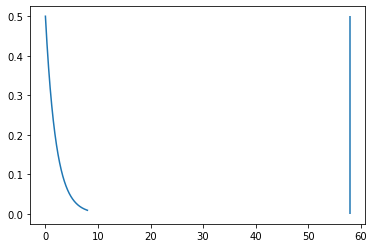

p-value given chisq of 57.91 and df of 2: 2.660745133449005e-13


In [43]:
#chi-squared value
chisq = 57.91

x_axis = np.arange(0, 8, 0.01)
plt.plot(x_axis, chi2.pdf(x_axis, df = 2))
plt.vlines(x = chisq, ymin = 0, ymax = 0.5)
plt.show()

#Calculate p-value
p_value = chi2.sf(x = chisq, df = 2)
print(f"p-value given chisq of 57.91 and df of 2: {p_value}")

#### Examine the Residuals

In [44]:
#Table 19.6, page 659

In [50]:
#Table 19.7, page 660
#Wrangle data
tattoo = pd.read_csv("datasets/tattoos.txt", sep = "\t")
tattoo = tattoo.assign(status = lambda tattoo: tattoo["Location"].map(lambda Location: "None" if Location == "No Tattoo" else "Tattoo"))

In [53]:
tattoo

,Location,Has hepatitis C,status
0,Commercial Parlor,Yes,Tattoo
1,Commercial Parlor,Yes,Tattoo
2,Commercial Parlor,Yes,Tattoo
3,Commercial Parlor,Yes,Tattoo
4,Commercial Parlor,Yes,Tattoo
...,...,...,...
621,No Tattoo,No,None
622,No Tattoo,No,None
623,No Tattoo,No,None
624,No Tattoo,No,None


In [56]:
table = pd.crosstab(index = tattoo["status"], columns = tattoo["Has hepatitis C"], margins = True)
table

Has hepatitis C,No,Yes,All
status,,,
None,491,22,513
Tattoo,88,25,113
All,579,47,626


#### Chi-Square and Causation